# Effect of Borrower's Characteristics on Loan Status
## by Esan Damilola

## Investigation Overview

In this section, I would like to focus on the featues that might influence the loan status, understand the distribution of the borrowers APR, rate and DTI ratio. I would also like to understand the loan original amount and its correlation with other features in the dataset

## Dataset Overview

This dataset is a structured dataset that contains information on loans facilitated by the peer-to-peer lending platform, Prosper. It has 113,066 (rows) and 22 variables (columns).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv('ProjectLoanData.csv')

# convert ProsperRating, IncomeRange and LoanStatus into ordered categorical types
ordinal_var_dict = {'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'IncomeRange': ['Not displayed', 'Not employed', '$1-24,999', '$25,000-49,999',
                                    '$50,000-74,999', '$75,000-99,999', '$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan_df[var] = loan_df[var].astype(ordered_var)

# Defining numeric and categorical columns 
numeric_cols = ['Term', 'BorrowerAPR', 'BorrowerRate', 'OpenRevolvingAccounts', 
                'CurrentDelinquencies', 'DelinquenciesLast7Years', 'DebtToIncomeRatio', 
                'LoanCurrentDaysDelinquent', 'LoanOriginalAmount', 'MonthlyLoanPayment']
categorical_cols = ['LoanStatus', 'ProsperRating (Alpha)', 'Occupation', 'EmploymentStatus', 
                    'IncomeRange', 'ListingCategory', 'CreditScore', 'IsBorrowerHomeowner', 
                    'IncomeVerifiable']

## Distribution of Loan Status

The LoanStatus has been categorized into three categories - Active, Repaid, and Defaulted. The Active category includes loans that are currently being paid. The Repaid category includes loans that have been fully paid. The Defaulted category includes loans that are past overdue or failed to be paid back, resulting in a loss for the lender. The distribution shows that majority of loans are in the Active category, followed by Repaid loans, and then Defaulted loans.

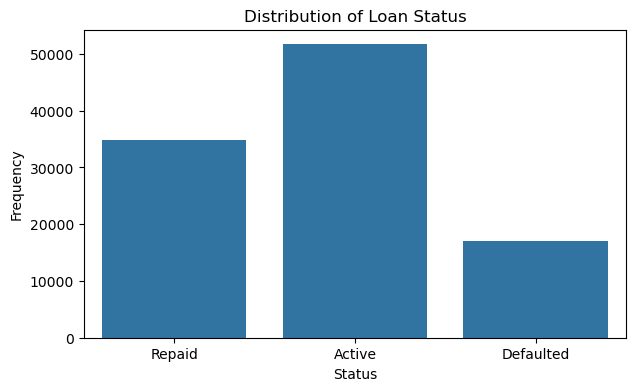

In [3]:
# Plotting the distribution of the loan status on a count plot
base_color = sb.color_palette()[0]

plt.figure(figsize=[7,4])
sb.countplot(data = loan_df, x = 'LoanStatus', color = base_color)
plt.title('Distribution of Loan Status')
plt.xlabel('Status')
plt.ylabel('Frequency');

## Distribution of Borrower's APR, Rate and Debt-To-Income (DTI) Ratio

The borrower APR is roughly normally distributed, the distribution ranges from approximately 0 to 0.5, indicating that there is variability in the APR rates offered by Prosper to its borrowers. The borrower rate is also roughly normally distributed, the distribution ranges from approximately 0 to 0.4, indicating that there is also variability in the interest rates offered by Prosper to its borrowers. 

Naturally, a DTI ratio that can qualify for a loan should not be more than 0.5 and should never be greater than or equal to 1 because that means the lender is using the entirety of its income to service a loan and are considered high risk debtors. There are 953 entries with DTI greater than 0.9, they were considered as outliers and excluded from the dataset.

After removing all ratios above 0.9, the majority of borrowers have a DTI ratio below 0.5. The histogram is skewed to the right, indicating that there are relatively fewer borrowers with a high DTI ratio. There is a peak at around 0.2, indicating that a significant number of borrowers have a DTI ratio in this range. There are also smaller peaks around 0.3 and 0.4, suggesting that there are still a considerable number of borrowers with a higher DTI ratio.The distribution is relatively smooth, indicating that there are no significant gaps or anomalies in the data anymore. Overall, it appears that most borrowers have a relatively low DTI ratio, which could be a positive factor in terms of their ability to repay their loans.

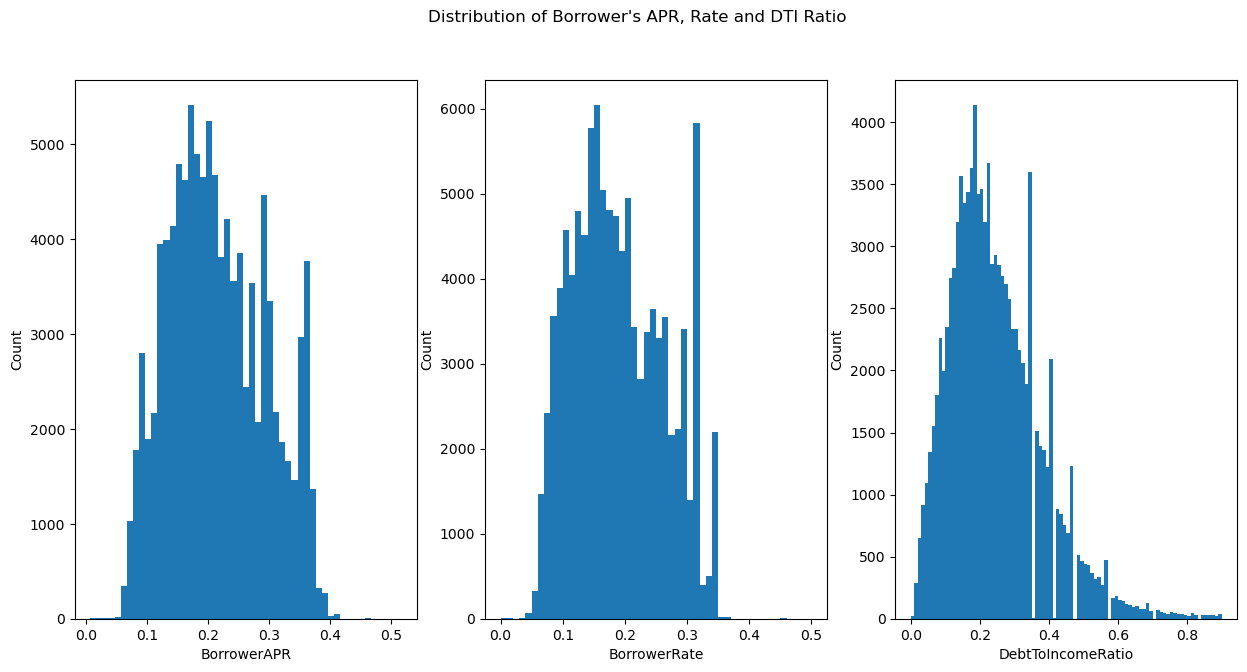

In [4]:
# Plotting the distribution od the borrower,s APR, rate and DTI ratio
fig, ax = plt.subplots(ncols=3, figsize = [15,7])

binsize = 0.01
variables = ['BorrowerAPR', 'BorrowerRate', 'DebtToIncomeRatio']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(loan_df[var]), max(loan_df[var]) + binsize, binsize)
    ax[i].hist(data = loan_df, x = var, bins = bins)
    ax[i].set_xlabel('{}'.format(var))
    ax[i].set_ylabel('Count')
    fig.suptitle("Distribution of Borrower's APR, Rate and DTI Ratio")

plt.show();

## Loan Status vs Borrower APR and Borrower Rate

There is a significant relationship between borrower APR and rate and loan status. The boxplots show that the median APR is highest for defaulted loans, followed by active loans, and then repaid loans. The IQR is also larger for defaulted loans, indicating more variability in APR for these loans. Borrowers with higher APRs and rates may be more likely to default which can impact loan performance and investor returns. Additionally, the transformation of the LoanStatus feature into three categories provides a more nuanced understanding of loan status and can help us better assess loan risk and make more informed lending decisions.

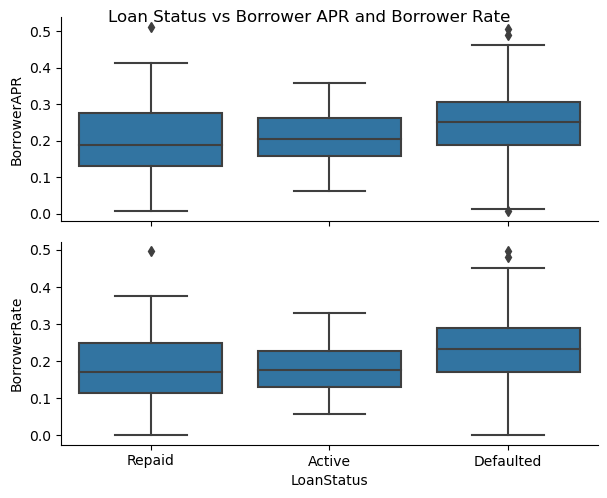

In [5]:
# Plotting loan status vs borrower APR and borrower rate
g = sb.PairGrid(data = loan_df, y_vars = ['BorrowerAPR', 'BorrowerRate'], x_vars = ['LoanStatus'], 
                aspect = 2.5)
g.map(sb.boxplot, color = base_color)
g.fig.suptitle('Loan Status vs Borrower APR and Borrower Rate')
plt.show();

## Loan Status vs Income Range

There is a slight decrease in the proportion of active loans as the income range increases, with a corresponding decrease in the proportion of repaid loans. Conversely, there is an increase in the proportion of defaulted loans as the income range decreases, with a corresponding increase in the proportion of repaid loans as income range decreases.

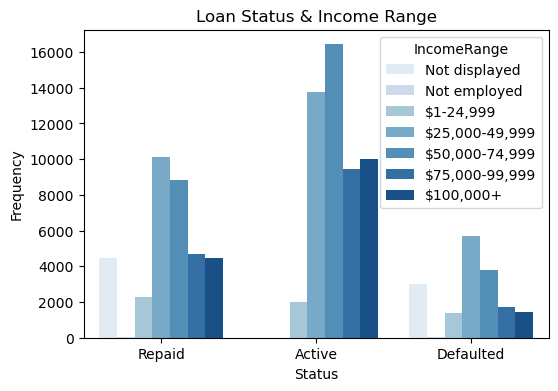

In [6]:
# Plotting a clustered bar chart of the loan status and income range
plt.figure(figsize=[6,4])

sb.countplot(data = loan_df, x = 'LoanStatus', hue = 'IncomeRange', palette = 'Blues')
plt.title('Loan Status & Income Range')
plt.xlabel('Status')
plt.ylabel('Frequency');

## Loan Amount vs Monthly Loan Payment by Loan Status

Most of the loans in the dataset fall under the Active loans, indicating that a significant proportion of borrowers are currently repaying their loans. There is also a significant number of Active loans where borrowers make higher monthly payments for relatively lesser loan amount.

The plot also shows that loans in the Repaid loans category tend to have a higher loan amount and monthly payment compared to those in the Defaulted loans category. This observation suggests that borrowers who take out larger loans and make higher monthly payments are more likely to repay their loans in full. Defaulted loans tend to have an average loan amount and monthly payment. This suggests that borrowers who take out smaller loans and make lower monthly payments may have weaker financial stability and are more likely to default on their loans.


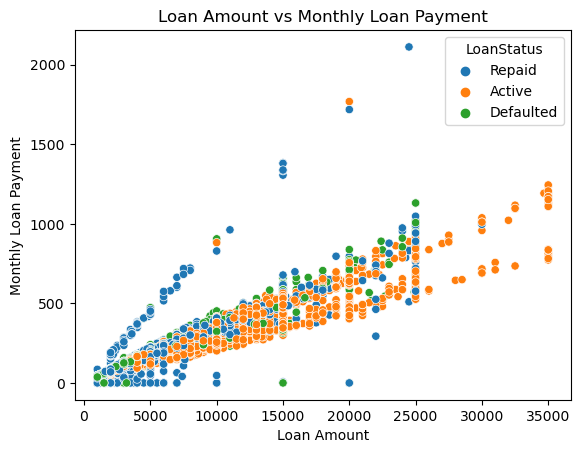

In [7]:
# Function to collect data sample
def get_sample(df, n):
    samples = np.random.choice(df.shape[0], n, replace=False)
    valid_samples = np.intersect1d(samples, df.index)
    return df.loc[valid_samples,:]

# A scatter plot with loan status as hue
loan_samp = get_sample(loan_df, 10000)

sb.scatterplot(x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', data = loan_samp, hue = 'LoanStatus')
plt.title('Loan Amount vs Monthly Loan Payment')
plt.xlabel('Loan Amount')
plt.ylabel('Monthly Loan Payment')
plt.show();

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt